## 6. Decision Trees and Ensemble Learning

### 6.1 Credit risk scoring project

In [261]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 6.2 Data cleaning and preparation
* Downloading the dataset
* Re-encoding the categorical variables
* Doing the train/validation/test split

In [262]:
# data = 'https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv'

In [263]:
# #download the dataset
# !python -m wget $data

In [264]:
df = pd.read_csv('CreditScoring.csv')

In [265]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [266]:
df.columns = df.columns.str.lower()

In [267]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [268]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [269]:
status_values = {
    1: 'ok', 
    2:'default', 
    0:'unk'
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent', 
    2: 'owner', 
    3: 'priv',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow',
    4: 'seperated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

record_values = {
    1: 'no_rec', 
    2: 'yes_rec', 
    0: 'unk'
}

df.records = df.records.map(record_values)

job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)


In [270]:
df.job.value_counts()

job
fixed        2806
freelance    1024
partime       452
others        171
unk             2
Name: count, dtype: int64

In [271]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [272]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [273]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [274]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [275]:
# removing status which is unknown
df = df[df.status != 'unk'].reset_index(drop=True)

#### Train/Validation/Test

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [278]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [279]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [280]:
del df_train['status']
del df_val['status']
del df_test['status']

In [281]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no_rec,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes_rec,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no_rec,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no_rec,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no_rec,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,priv,36,45,married,no_rec,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,priv,60,29,married,no_rec,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no_rec,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no_rec,freelance,60,100.0,18000.0,0.0,2500,2976


### 6.3 Decision trees
* How a decision tree looks like
* Training a decision tree
* Overfitting
* Controlling the size of a tree

In [282]:
def assess_risk(client):
    if client['records'] < 'yes':
        if client['job'] == 'partime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [283]:
xi = df_train.iloc[0].to_dict()

In [284]:
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no_rec',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [285]:
assess_risk(xi)

'ok'

In [286]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [287]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [288]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [289]:
# dv.get_feature_names_out()
dt = DecisionTreeClassifier() #max_depth --> indefinite: many layers
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [290]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [291]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [292]:
roc_auc_score(y_val, y_pred)

0.6546614274297062

In [293]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

### Overfitting: Memorizing the data but failed to generalize
* minimize the depth of the tree
* one condition is called 'decision stump' (i.e: max_depth=1)

In [294]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [295]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [296]:
from sklearn.tree import export_text

In [297]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=no_rec <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no_rec >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



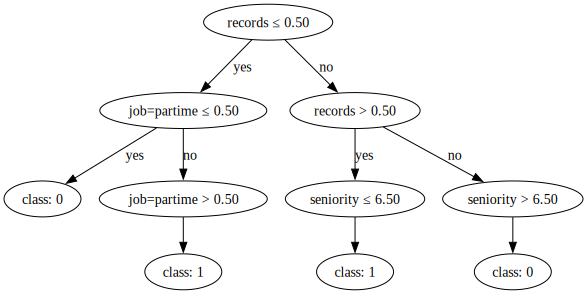

In [298]:
from graphviz import Digraph
from IPython.display import display

# Initialize the Digraph
dot = Digraph()

# Add nodes and edges based on the tree structure
dot.node('A', 'records ≤ 0.50')
dot.node('B', 'job=partime ≤ 0.50')
dot.node('C', 'class: 0')
dot.node('D', 'job=partime > 0.50')
dot.node('E', 'class: 1')
dot.node('F', 'records > 0.50')
dot.node('G', 'seniority ≤ 6.50')
dot.node('H', 'class: 1')
dot.node('I', 'seniority > 6.50')
dot.node('J', 'class: 0')

# Define edges between nodes
dot.edge('A', 'B', 'yes')
dot.edge('A', 'F', 'no')
dot.edge('B', 'C', 'yes')
dot.edge('B', 'D', 'no')
dot.edge('D', 'E')
dot.edge('F', 'G', 'yes')
dot.edge('F', 'I', 'no')
dot.edge('G', 'H')
dot.edge('I', 'J')

# Display the graph inline in the notebook
display(dot)


### 6.4 Decision tree learning algorithm
* finding the best split for one column
* finding the best split for the entire dataset
* stopping criteria
* decision tree learning algorithm

In [299]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0   , 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default']    
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [300]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [301]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [302]:
for T in Ts:
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(f'{T}')
    display(f'This is left')
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(f'This is right')
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

'0'

'This is left'

,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


'This is right'

,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64



'2000'

'This is left'

,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


'This is right'

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64



'3000'

'This is left'

,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


'This is right'

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64



'4000'

'This is left'

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


'This is right'

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64



'5000'

'This is left'

,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


'This is right'

,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64



'8000'

'This is left'

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


'This is right'

,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



### Algorithm and Impurity

![alt text](trees_algorithm.png)

In [303]:
# with three features
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [0   , 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default']    
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [304]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [305]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [306]:
for feature, Ts in thresholds.items():
    print('#######################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#######################')

#######################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#######################
#######################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#######################


Still 10% is best

![alt text](trees_algorithm_multiple_feature.png)

#### Algorithm:

    for F in features:
        find all thresholds for F
        
        for T in thresholds:
            split dataset using 'F>T' condition
            compute the impurity of this split

        Select the condition with the lowest impurity

#### Stopping Criteria:

    * Group is already pure
    * Tree reached depth limit
    * Group too small to split

#### Decision Tree Learning Algorithm:

    * Find the BEST SPLIT
    * STOP IF MAX_DEPTH is reached
    * IF LEFT is sufficiently LARGE AND NOT PURE:
        * REPEAT FOR LEFT
    * IF RIGH is sufficiently LARGE AND NOT PURE:
        * REPEAT FOR RIGHT

More Info: https://scikit-learn.org/1.5/modules/tree.html

Commonly Used Classification Criteria: __Gini__ and __Entropy (Log Loss)__

#### 6.5 Decision trees parameter tuning
* selecting <code>max_depth</code>
* selecting <code>min_samples_leaf</code>

In [307]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    # print(f'{d}', '-->', f'{round(auc,3)}')
    print('%4s - > %.3f' % (d, auc))

   1 - > 0.606
   2 - > 0.669
   3 - > 0.739
   4 - > 0.761
   5 - > 0.766
   6 - > 0.762
  10 - > 0.691
  15 - > 0.670
  20 - > 0.645
None - > 0.669


* The best depth is around 4, 5, 6

In [308]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        # print(f'{d}', '-->', f'{round(auc,3)}')
        scores.append((d, s, auc))
        # print('(%4s, %3d) - > %.3f' % (d, s, auc))


In [309]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726


In [310]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
40,10.0,15,0.788444
49,15.0,15,0.787426
67,NaN,15,0.787305
58,20.0,15,0.786576
41,10.0,20,0.786001


In [311]:
# pivot dataframe
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                                  columns=['max_depth'],
                                  values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.669  0.761  0.766  0.753  0.745  0.687  0.675  0.654
2                 0.690  0.761  0.766  0.755  0.760  0.719  0.683  0.685
5                 0.715  0.761  0.768  0.759  0.759  0.720  0.716  0.710
10                0.758  0.761  0.762  0.778  0.763  0.768  0.760  0.761
15                0.787  0.764  0.772  0.785  0.780  0.788  0.787  0.787
20                0.783  0.761  0.774  0.773  0.779  0.786  0.784  0.781
100               0.780  0.756  0.763  0.776  0.780  0.779  0.779  0.779
200               0.768  0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

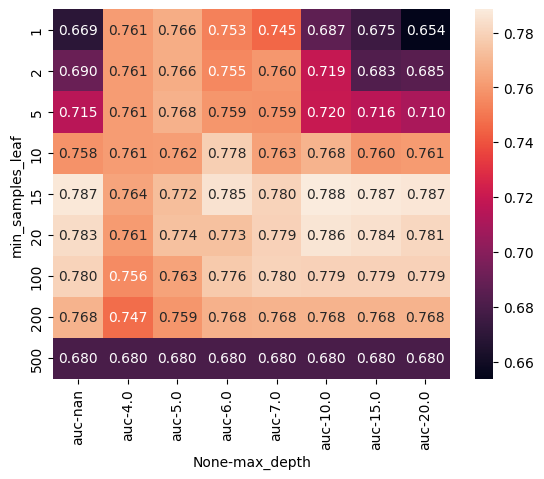

In [312]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f');

In [313]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

### 6.6 Ensembles and random forest
* Board of experts
* Ensembling models
* Random forest - ensembling decision trees
* Tuning random forest

In [314]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
# n_estimators --> no. of models
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [316]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [317]:
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [318]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

* iterate over different n_estimators

In [319]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [320]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

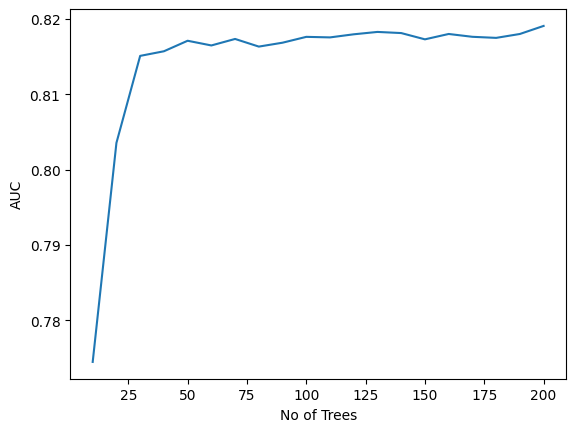

In [321]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('No of Trees')
plt.ylabel('AUC')
plt.show()

In [322]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d, 
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [323]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


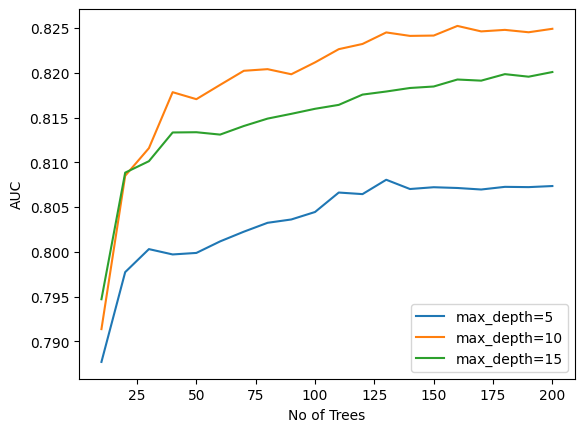

In [324]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth ==d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)
plt.xlabel('No of Trees')
plt.ylabel('AUC')
plt.legend()
plt.show()

* <code>max_depth = 10 </code>

In [325]:
max_depth = 10

In [326]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [327]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


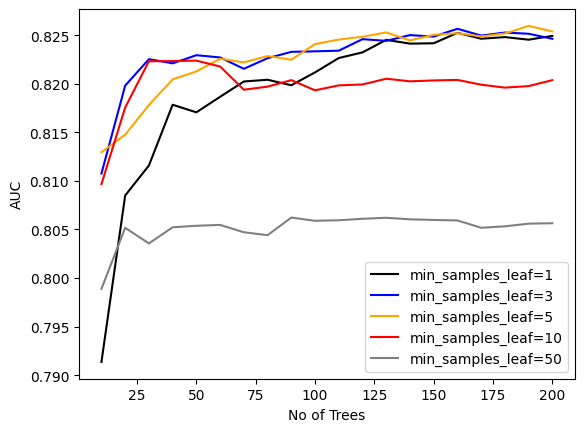

In [328]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, 
             df_subset.auc,
             color=col, 
             label='min_samples_leaf=%d' % s)
plt.xlabel('No of Trees')
plt.ylabel('AUC')
plt.legend()
plt.show()

* <code> min_samples_leaf = 3 </code>

In [329]:
min_samples_leaf = 3

In [330]:
# n_jobs = -1; use all the processors (parallel computing)
rf = RandomForestClassifier(n_estimators=100,
                                    max_depth=max_depth,
                                    min_samples_leaf=min_samples_leaf,
                                    random_state=1,
                                    n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_jobs=-1,
                       random_state=1)

* Other useful parameters:
    * <code> max_features </code>
    * <code> bootstrap </code>

### 6.7 Gradient Boosing and XGBoost
* Gradient boosting vs random forest
* Installing XGBoost
* Training the first model
* Performance monitoring
* Parsing XGBoost's monitoring output

![alt text](6_7_boosting.png)

![alt text](6_7_boosting_xgboost.png)

In [331]:
# # install xgboost
# !pip install xgboost

In [332]:
import xgboost as xgb

In [333]:
features = dv.get_feature_names_out()
print(type(features), features)
print()
print(list(features))

<class 'numpy.ndarray'> ['age' 'amount' 'assets' 'debt' 'expenses' 'home=ignore' 'home=other'
 'home=owner' 'home=parents' 'home=priv' 'home=rent' 'home=unk' 'income'
 'job=fixed' 'job=freelance' 'job=others' 'job=partime' 'job=unk'
 'marital=divorced' 'marital=married' 'marital=seperated' 'marital=single'
 'marital=unk' 'marital=widow' 'price' 'records=no_rec' 'records=yes_rec'
 'seniority' 'time']

['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore', 'home=other', 'home=owner', 'home=parents', 'home=priv', 'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance', 'job=others', 'job=partime', 'job=unk', 'marital=divorced', 'marital=married', 'marital=seperated', 'marital=single', 'marital=unk', 'marital=widow', 'price', 'records=no_rec', 'records=yes_rec', 'seniority', 'time']


In [334]:
# wrap training data to DMatrix <- (To Train XGBoost)
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(features))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(features))

In [335]:
xgb_params = {
    'eta': 0.3, #learning rate
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1, #show only {no. of warnings}
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [336]:
y_pred = model.predict(dval)

In [337]:
roc_auc_score(y_val, y_pred)

0.8065256351262986

In [338]:
watchlist = [(dtrain, 'Train'), (dval, 'val')]

In [339]:
%%capture output
# getting output for plot from xgboost bit difficult, hence


xgb_params = {
    'eta': 0.3, #learning rate
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1, #show only {no. of warnings}
}

model = xgb.train(xgb_params, dtrain, 
                  evals = watchlist,
                  verbose_eval = 5,
                  num_boost_round=200)

In [340]:
s = output.stdout

In [341]:
s

'[0]\tTrain-auc:0.86730\tval-auc:0.77938\n[5]\tTrain-auc:0.93086\tval-auc:0.80858\n[10]\tTrain-auc:0.95447\tval-auc:0.80851\n[15]\tTrain-auc:0.96554\tval-auc:0.81334\n[20]\tTrain-auc:0.97464\tval-auc:0.81729\n[25]\tTrain-auc:0.97953\tval-auc:0.81686\n[30]\tTrain-auc:0.98579\tval-auc:0.81543\n[35]\tTrain-auc:0.99011\tval-auc:0.81206\n[40]\tTrain-auc:0.99421\tval-auc:0.80922\n[45]\tTrain-auc:0.99548\tval-auc:0.80842\n[50]\tTrain-auc:0.99653\tval-auc:0.80918\n[55]\tTrain-auc:0.99765\tval-auc:0.81114\n[60]\tTrain-auc:0.99817\tval-auc:0.81172\n[65]\tTrain-auc:0.99887\tval-auc:0.80798\n[70]\tTrain-auc:0.99934\tval-auc:0.80870\n[75]\tTrain-auc:0.99965\tval-auc:0.80555\n[80]\tTrain-auc:0.99979\tval-auc:0.80549\n[85]\tTrain-auc:0.99988\tval-auc:0.80374\n[90]\tTrain-auc:0.99993\tval-auc:0.80409\n[95]\tTrain-auc:0.99996\tval-auc:0.80548\n[100]\tTrain-auc:0.99998\tval-auc:0.80509\n[105]\tTrain-auc:0.99999\tval-auc:0.80629\n[110]\tTrain-auc:1.00000\tval-auc:0.80637\n[115]\tTrain-auc:1.00000\tval-au

In [342]:
line = s.split('\n')[0]

In [343]:
num_iter, train_auc, val_auc = line.split('\t')

In [344]:
int(num_iter.strip('[]'))

0

In [345]:
float(train_auc.split(':')[1])

0.8673

In [346]:
float(val_auc.split(':')[1])

0.77938

In [347]:
# the whole def function
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        num_iter, train_auc, val_auc = line.split('\t')
        num = int(num_iter.strip('[]'))
        train = float(train_auc.split(':')[1])
        val = float(val_auc.split(':')[1])

        results.append((num, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [348]:
df_score = parse_xgb_output(output)

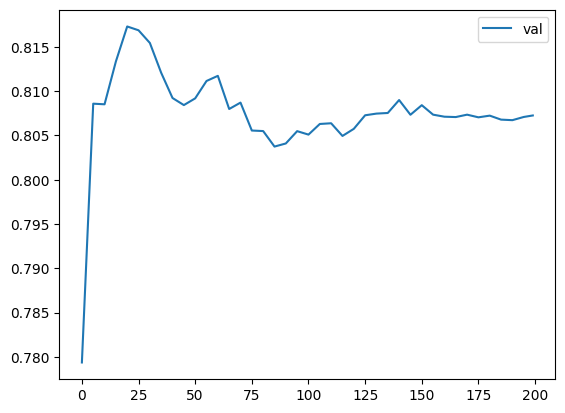

In [349]:
# plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.show()

### 6.8 XGBoost parameter tuning
* Tuning the following parameters: (Like this order)
    * <code>eta = Learning Rate = Size of Step</code>
    * <code>max_depth</code>
    * <code>min_child_weight ~ (Min-Samples_Leaf_in_RF)</code>

##### ETA

In [350]:
scores = {}

In [364]:
%%capture output

xgb_params = {
    'eta': 0.03,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1, 
}

model = xgb.train(xgb_params, dtrain, 
                  evals = watchlist,
                  verbose_eval = 5,
                  num_boost_round=200)

In [365]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [366]:
key

'eta=0.03'

In [367]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.1', 'eta=0.05', 'eta=0.03'])

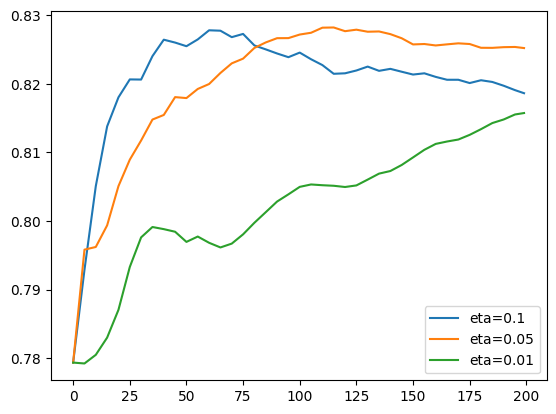

In [368]:
etas = ['eta=0.1', 'eta=0.05', 'eta=0.01']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()
plt.show()

##### MAX_DEPTH

In [369]:
scores = {}

In [382]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 7,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1, 
}

model = xgb.train(xgb_params, dtrain, 
                  evals = watchlist,
                  verbose_eval = 5,
                  num_boost_round=200)

In [383]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=7'

In [384]:
scores.keys()

dict_keys(['max_depth=10', 'max_depth=5', 'max_depth=30', 'max_depth=3', 'max_depth=7'])

In [391]:
#removing max_depth = 10, 30
# del scores['max_depth=10']
del scores['max_depth=30']

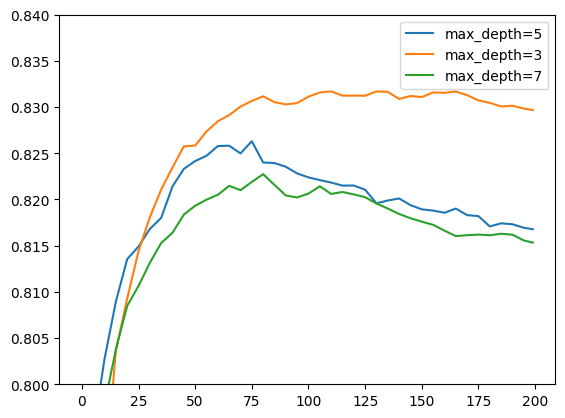

In [392]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)     #limiting Y-Axis
plt.legend()

##### MIN_CHILD_WEIGHT

In [393]:
scores = {}

In [402]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1, 
}

model = xgb.train(xgb_params, dtrain, 
                  evals = watchlist,
                  verbose_eval = 5,
                  num_boost_round=200)

In [403]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

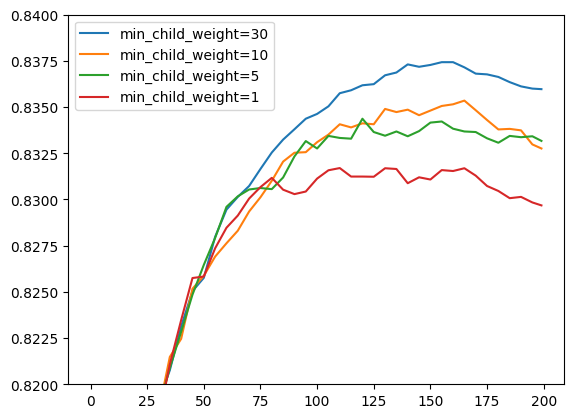

In [404]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.82, 0.84)
plt.legend()

* There is no significant change in min_child_weight --> 1

#### Final Model

In [405]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

Other parameters: https://xgboost.readthedocs.io/

Useful ones: <br>
    * <code> subsample </code> and <code> colsample_bytree </code> <br>
    * <code> lambda </code> and <code> alpha </code>

### 6.9 Selecting the final model
* Choosing between xgboost, random forest, and decision tree
* Training the final model
* Saving the model

In [406]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [407]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

In [408]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [409]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7850802838390931

In [410]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8233361991717324

In [411]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8309347073212081

In [412]:
# using full training dataset
df_full_train = df_full_train.reset_index(drop=True)

In [413]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [414]:
del df_full_train['status']

In [415]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [416]:
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [417]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [418]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1, 
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [419]:
y_pred = model.predict(dtest)

In [421]:
roc_auc_score(y_test, y_pred)

0.8289367577342261

### 6.10 Summary
* Decision trees learn if-then-else rules from data.
* Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group.
* Random forest is a way of combining multiple decision trees. It should have a diverse set of models to make good predictions.
* Gradient boosting trains model sequentially; each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting

### 6.11 Explore more